In [1]:
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Explore

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Explore datetime

In [4]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


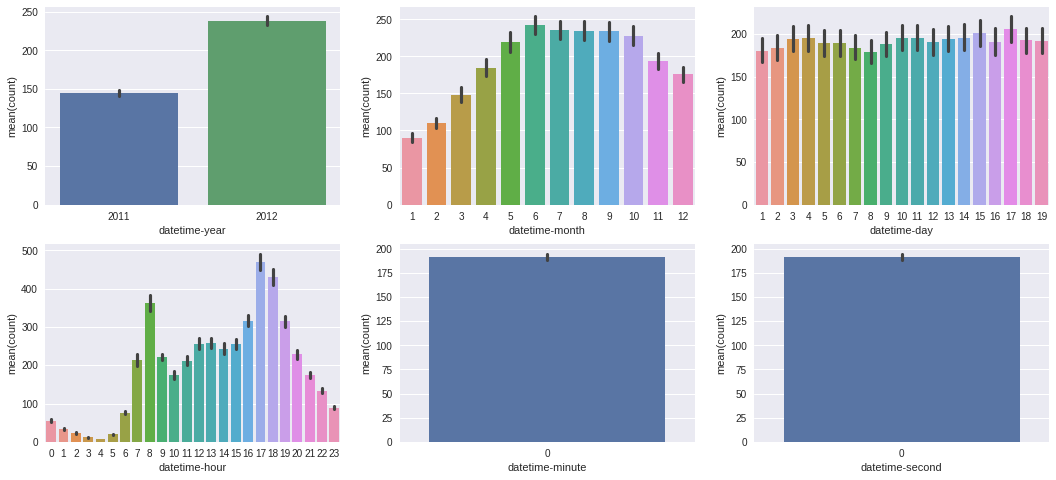

In [5]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

** Lesson Learned **
  * **datetime-minute**와 **datetime-second**는 현재 기록되고 있지 않다. 그러므로 사용할 필요가 없다.
  * train.csv와 test.csv는 **datetime-day**를 기준으로 나뉘어져 있다. 그러므로 **datetime-day**를 feature로 사용해서는 안 된다.

### Explore hour - workingday

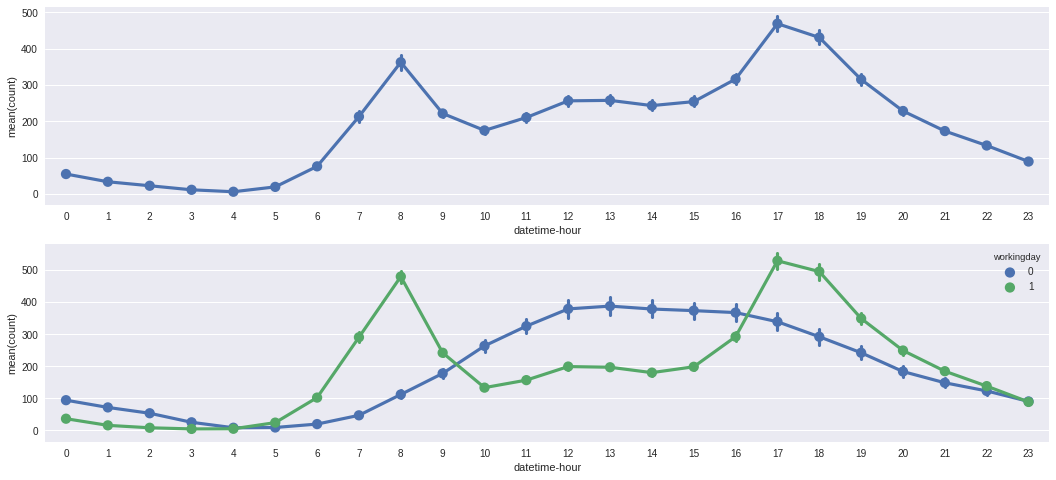

In [6]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

** Lesson Learned **
  * 주중(workingday==1)에는 출근 시간과 퇴근 시간에 자전거를 많이 대여한다.
  * 주말(workingday==0)에는 오후 시간에 자전거를 많이 대여한다.
  * 주중(월,화,수,목,금)이 주말(토,일)보다 많기 때문에, 두 개를 나눠서 보지 않으면 주말의 특성을 파악할 수 없다.

### Explore hour - dayofweek

In [7]:
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


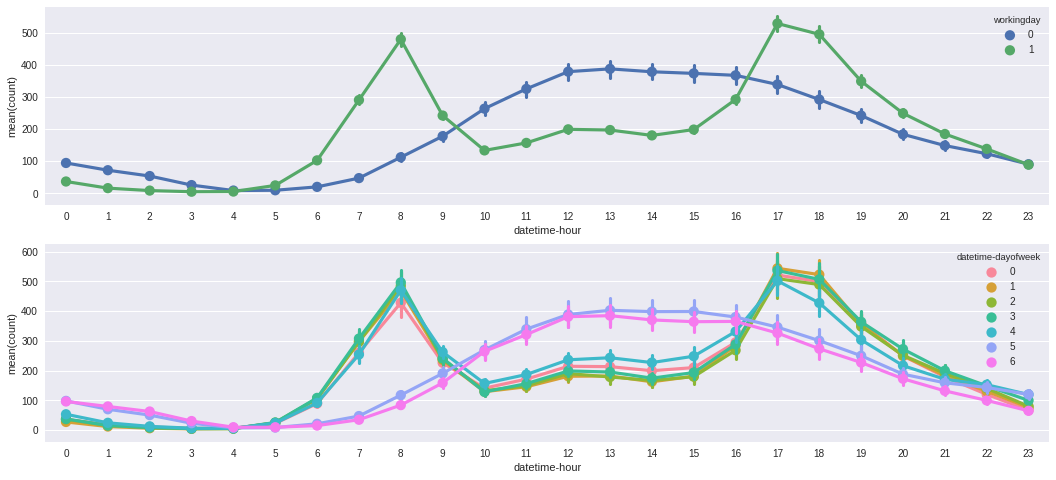

In [8]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

** Lesson Learned **
  * 금요일(workingday==4)는 주중이지만, 아주 약간 주말의 특성을 반영하고 있다.
  * 비슷하게 월요일(workingday==0)도 아주 약간 주말의 특성을 반영하고 있다.
  * 사람들이 휴가를 월요일과 금요일에 사용하기 때문이라고 추측할 수 있다.

### Concatenate year and month

In [9]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 20)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


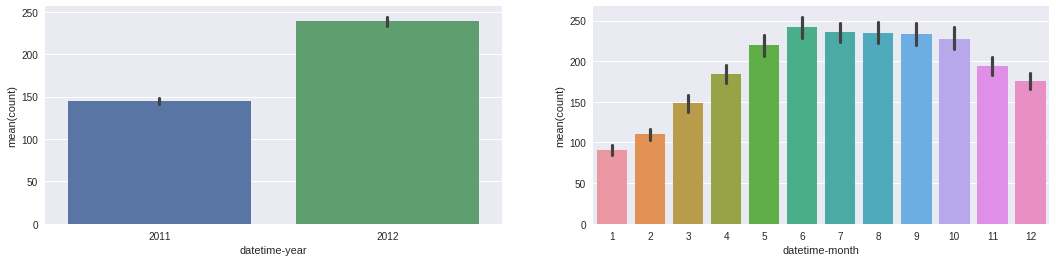

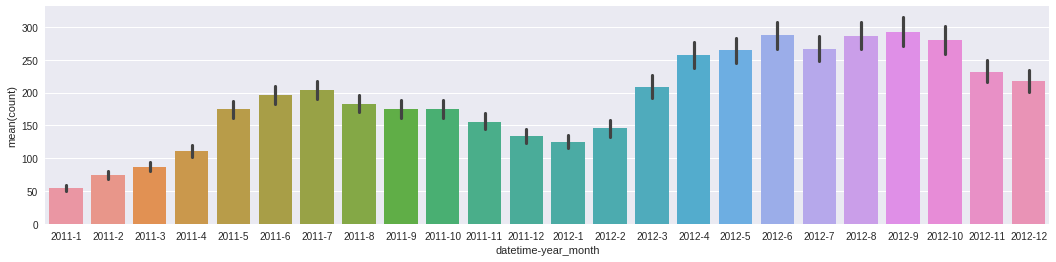

In [10]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)


figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

** Lesson Learned **
  * 2011년 12월과 2012년 1월의 자전거 대여량을 비슷하지만, 두 개를 따로 놓고 보면 이를 알 수 없다.
  * 2011년에는 8월부터 대여량이 감소하고, 2012년에는 7월부터 대여량이 감소한다. 마찬가지로 따로 놓고 보면 이를 알 수 없다.

## Count

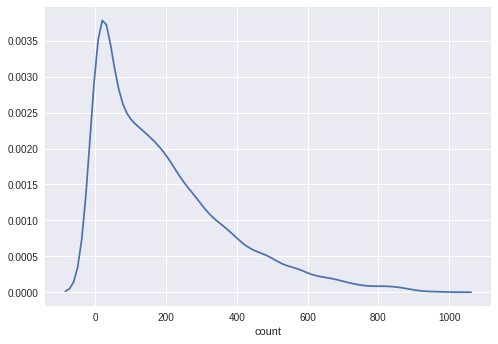

In [39]:
sns.distplot(train["count"], hist=False)

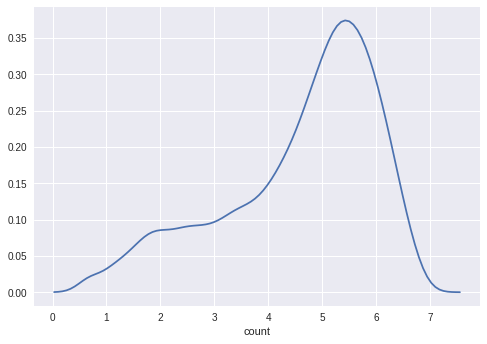

In [44]:
sns.distplot(np.log(train["count"] + 1), hist=False)

** Lesson Learned **
  * **count**는 skewed 되어있다. 가우시안 분포에 맞게 수정해주면 모델이 데이터를 더 잘 받아들일 가능성이 있다.

## Reload Dataset

In [11]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### Parse datetime

In [13]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [14]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(6493, 15)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


## concatenate year and month

In [15]:
train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 19)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [16]:
train_year_month = pd.get_dummies(train["datetime-year_month"], prefix="datetime")

print(train_year_month.shape)
train_year_month.head()

(10886, 24)


,datetime_2011-1,datetime_2011-10,datetime_2011-11,datetime_2011-12,datetime_2011-2,datetime_2011-3,datetime_2011-4,datetime_2011-5,datetime_2011-6,datetime_2011-7,...,datetime_2012-11,datetime_2012-12,datetime_2012-2,datetime_2012-3,datetime_2012-4,datetime_2012-5,datetime_2012-6,datetime_2012-7,datetime_2012-8,datetime_2012-9
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train = pd.concat([train, train_year_month], axis=1)

print(train.shape)
train.head()

(10886, 43)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_2012-11,datetime_2012-12,datetime_2012-2,datetime_2012-3,datetime_2012-4,datetime_2012-5,datetime_2012-6,datetime_2012-7,datetime_2012-8,datetime_2012-9
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
test["datetime-year_month"] = test["datetime"].apply(concatenate_year_month)

print(test.shape)
test[["datetime", "datetime-year_month"]].head()

(6493, 16)


,datetime,datetime-year_month
0,2011-01-20 00:00:00,2011-1
1,2011-01-20 01:00:00,2011-1
2,2011-01-20 02:00:00,2011-1
3,2011-01-20 03:00:00,2011-1
4,2011-01-20 04:00:00,2011-1


In [19]:
test_year_month = pd.get_dummies(test["datetime-year_month"], prefix="datetime")

print(test_year_month.shape)
test_year_month.head()

(6493, 24)


,datetime_2011-1,datetime_2011-10,datetime_2011-11,datetime_2011-12,datetime_2011-2,datetime_2011-3,datetime_2011-4,datetime_2011-5,datetime_2011-6,datetime_2011-7,...,datetime_2012-11,datetime_2012-12,datetime_2012-2,datetime_2012-3,datetime_2012-4,datetime_2012-5,datetime_2012-6,datetime_2012-7,datetime_2012-8,datetime_2012-9
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test = pd.concat([test, test_year_month], axis=1)

print(test.shape)
test.head()

(6493, 40)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime_2012-11,datetime_2012-12,datetime_2012-2,datetime_2012-3,datetime_2012-4,datetime_2012-5,datetime_2012-6,datetime_2012-7,datetime_2012-8,datetime_2012-9
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,0,0,0,0,0,0,0,0


### Parse dayofweek

In [21]:
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 44)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


In [22]:
train_dayofweek = pd.get_dummies(train["datetime-dayofweek"], prefix="datetime-dayofweek")

print(train_dayofweek.shape)
train_dayofweek.head()

(10886, 7)


,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [23]:
train = pd.concat([train, train_dayofweek], axis=1)

print(train.shape)
train.head()

(10886, 51)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_2012-8,datetime_2012-9,datetime-dayofweek,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,5,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,5,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,5,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,5,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,5,0,0,0,0,0,1,0


In [24]:
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime-dayofweek"]].head()

(6493, 41)


,datetime,datetime-dayofweek
0,2011-01-20 00:00:00,3
1,2011-01-20 01:00:00,3
2,2011-01-20 02:00:00,3
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,3


In [25]:
test_dayofweek = pd.get_dummies(test["datetime-dayofweek"], prefix="datetime-dayofweek")

print(test_dayofweek.shape)
test_dayofweek.head()

(6493, 7)


,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [26]:
test = pd.concat([test, test_dayofweek], axis=1)

print(test.shape)
test.head()

(6493, 48)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime_2012-8,datetime_2012-9,datetime-dayofweek,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,3,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,3,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,3,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,3,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,3,0,0,0,1,0,0,0


### Transform skewed label

In [58]:
train["log_count_plus"] = np.log(train["count"] + 1)
train["count(recover)"] = np.exp(train["log_count_plus"]) - 1 #np.log(train["count"] + 1)

print(train.shape)
train[["count", "log_count_plus", "count(recover)"]].head()

(10886, 53)


,count,log_count_plus,count(recover)
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


## Train

In [49]:
feature_names = ["season", "holiday", "workingday", "weather", \
                 "temp", "atemp", "humidity", "windspeed", "datetime-hour"]

feature_names = feature_names + list(train_year_month.columns)
feature_names = feature_names + list(train_dayofweek.columns)

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-hour',
 'datetime_2011-1',
 'datetime_2011-10',
 'datetime_2011-11',
 'datetime_2011-12',
 'datetime_2011-2',
 'datetime_2011-3',
 'datetime_2011-4',
 'datetime_2011-5',
 'datetime_2011-6',
 'datetime_2011-7',
 'datetime_2011-8',
 'datetime_2011-9',
 'datetime_2012-1',
 'datetime_2012-10',
 'datetime_2012-11',
 'datetime_2012-12',
 'datetime_2012-2',
 'datetime_2012-3',
 'datetime_2012-4',
 'datetime_2012-5',
 'datetime_2012-6',
 'datetime_2012-7',
 'datetime_2012-8',
 'datetime_2012-9',
 'datetime-dayofweek_0',
 'datetime-dayofweek_1',
 'datetime-dayofweek_2',
 'datetime-dayofweek_3',
 'datetime-dayofweek_4',
 'datetime-dayofweek_5',
 'datetime-dayofweek_6']

In [50]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 40)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-hour,datetime_2011-1,...,datetime_2012-7,datetime_2012-8,datetime_2012-9,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,1,0,0,1,9.84,14.395,81,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,9.02,13.635,80,0.0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,9.02,13.635,80,0.0,2,1,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,1,9.84,14.395,75,0.0,3,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,1,9.84,14.395,75,0.0,4,1,...,0,0,0,0,0,0,0,0,1,0


In [51]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 40)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-hour,datetime_2011-1,...,datetime_2012-7,datetime_2012-8,datetime_2012-9,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,1,0,1,1,10.66,11.365,56,26.0027,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,1,1,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,3,1,...,0,0,0,0,0,0,1,0,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,4,1,...,0,0,0,0,0,0,1,0,0,0


In [52]:
label_name = "log_count_plus"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log_count_plus, dtype: float64

## Tune Hyperparameter

In [68]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
#     log_predict = np.log(predict + 1)
#     log_actual = np.log(actual + 1)

    log_predict = predict
    log_actual = actual
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

### Case 1 - Grid Search

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

n_estimators = 100

max_depth_list = [1, 3, 5, 7, 9]
max_features_list = [0.1, 0.3, 0.5, 0.7, 0.9]

hyperparameter_list = []

for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      max_features=max_features,
                                      n_jobs=-1,
                                      random_state=37)
        


        score = cross_val_score(model, X_train, y_train, cv=20, \
                                scoring=rmsle_scorer).mean()
        
        print("n_estimators = {0}, max_depth = {1}, max_features = {2}, score = {3:.5f}" \
                  .format(n_estimators, max_depth, max_features, score))
        
        hyperparameter = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
            'score': score,
        }
        
        hyperparameter_list.append(hyperparameter)
        
hyperparameter_list = pd.DataFrame.from_dict(hyperparameter_list)
hyperparameter_list = hyperparameter_list.sort_values("score", ascending=True)

hyperparameter_list.head()

n_estimators = 100, max_depth = 5, max_features = 0.5, score = 0.66076
n_estimators = 100, max_depth = 5, max_features = 0.7, score = 0.63209
n_estimators = 100, max_depth = 10, max_features = 0.5, score = 0.48765
n_estimators = 100, max_depth = 10, max_features = 0.7, score = 0.46952
n_estimators = 100, max_depth = 100, max_features = 0.5, score = 0.41969
n_estimators = 100, max_depth = 100, max_features = 0.7, score = 0.41753


,max_depth,max_features,n_estimators,score
5,100,0.7,100,0.417532
4,100,0.5,100,0.419691
3,10,0.7,100,0.469524
2,10,0.5,100,0.487646
1,5,0.7,100,0.632094


### Case 2 - Random Search(Coarse)

In [87]:
import numpy as np

num_epoch = 100
n_estimators = 100

coarse_hyperparameter_list = []

for epoch in range(num_epoch):
    max_depth = int(np.random.uniform(1, 100))
    max_features = np.random.uniform(0.1, 1.0)
    
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  n_jobs=-1,
                                  random_state=37)


    score = cross_val_score(model, X_train, y_train, cv=20, \
                            scoring=rmsle_scorer).mean()

    print("n_estimators = {0}, max_depth = {1}, max_features = {2:.6f}, score = {3:.5f}" \
              .format(n_estimators, max_depth, max_features, score))

    hyperparameter = {
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
        'score': score,
    }

    coarse_hyperparameter_list.append(hyperparameter)

coarse_hyperparameter_list = pd.DataFrame.from_dict(coarse_hyperparameter_list)
coarse_hyperparameter_list = coarse_hyperparameter_list.sort_values("score", ascending=True)

coarse_hyperparameter_list.head()

n_estimators = 30, max_depth = 9, max_features = 0.844159, score = 0.48443
n_estimators = 30, max_depth = 90, max_features = 0.228910, score = 0.48949
n_estimators = 30, max_depth = 35, max_features = 0.529930, score = 0.42751
n_estimators = 30, max_depth = 35, max_features = 0.604854, score = 0.42568
n_estimators = 30, max_depth = 24, max_features = 0.688206, score = 0.42310
n_estimators = 30, max_depth = 25, max_features = 0.842071, score = 0.42352
n_estimators = 30, max_depth = 42, max_features = 0.627059, score = 0.42541
n_estimators = 30, max_depth = 57, max_features = 0.576881, score = 0.42505
n_estimators = 30, max_depth = 58, max_features = 0.913828, score = 0.42134
n_estimators = 30, max_depth = 45, max_features = 0.786109, score = 0.42027


,max_depth,max_features,n_estimators,score
9,45,0.786109,30,0.420268
8,58,0.913828,30,0.421341
4,24,0.688206,30,0.423101
5,25,0.842071,30,0.423517
7,57,0.576881,30,0.425045


In [88]:
minimum_max_depth = 30
maximum_max_depth = 50

minimum_max_features = 0.6
maximum_max_features = 0.7

In [90]:
import numpy as np

num_epoch = 100
n_estimators = 100

finer_hyperparameter_list = []

for epoch in range(num_epoch):
    max_depth = int(np.random.uniform(minimum_max_depth, maximum_max_depth))
    max_features = np.random.uniform(minimum_max_features, maximum_max_features)
    
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  n_jobs=-1,
                                  random_state=37)


    score = cross_val_score(model, X_train, y_train, cv=20, \
                            scoring=rmsle_scorer).mean()

    print("n_estimators = {0}, max_depth = {1}, max_features = {2:.6f}, score = {3:.5f}" \
              .format(n_estimators, max_depth, max_features, score))

    hyperparameter = {
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
        'score': score,
    }

    finer_hyperparameter_list.append(hyperparameter)

finer_hyperparameter_list = pd.DataFrame.from_dict(finer_hyperparameter_list)
finer_hyperparameter_list = finer_hyperparameter_list.sort_values("score", ascending=True)

finer_hyperparameter_list.head()

n_estimators = 30, max_depth = 39, max_features = 0.682693, score = 0.42316
n_estimators = 30, max_depth = 30, max_features = 0.615203, score = 0.42350
n_estimators = 30, max_depth = 46, max_features = 0.672589, score = 0.42211
n_estimators = 30, max_depth = 38, max_features = 0.628662, score = 0.42563
n_estimators = 30, max_depth = 39, max_features = 0.647156, score = 0.42503
n_estimators = 30, max_depth = 34, max_features = 0.685331, score = 0.42174
n_estimators = 30, max_depth = 38, max_features = 0.665181, score = 0.42216
n_estimators = 30, max_depth = 32, max_features = 0.674570, score = 0.42357
n_estimators = 30, max_depth = 46, max_features = 0.697989, score = 0.42313
n_estimators = 30, max_depth = 41, max_features = 0.691980, score = 0.42298


,max_depth,max_features,n_estimators,score
5,34,0.685331,30,0.421738
2,46,0.672589,30,0.422113
6,38,0.665181,30,0.422164
9,41,0.691980,30,0.422982
8,46,0.697989,30,0.423131


In [93]:
# from sklearn.tree import DecisionTreeRegressor

# model = DecisionTreeRegressor(random_state=37)
# model

from sklearn.ensemble import RandomForestRegressor

n_estimators = 3000

model = RandomForestRegressor(n_estimators=n_estimators,
                              max_depth=38,
                              max_features=0.782782,
                              n_jobs=-1,
                              random_state=37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=38,
           max_features=0.782782, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=3000, n_jobs=-1, oob_score=False, random_state=37,
           verbose=0, warm_start=False)

## Score

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

## Train

In [94]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=38,
           max_features=0.782782, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=3000, n_jobs=-1, oob_score=False, random_state=37,
           verbose=0, warm_start=False)

In [95]:
predictions = model.predict(X_test)

predictions = np.exp(predictions) - 1

print(predictions.shape)
predictions

(6493,)


array([  9.41652339,   4.57161465,   3.12111262, ...,  80.560672  ,
        66.75735889,  42.31960521])

## Submit

In [96]:
submission = pd.read_csv("data/sampleSubmission.csv")

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,9.416523
1,2011-01-20 01:00:00,4.571615
2,2011-01-20 02:00:00,3.121113
3,2011-01-20 03:00:00,3.087582
4,2011-01-20 04:00:00,2.578376


In [97]:
submission.to_csv("to-the-top-10.csv", index=False)